# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [56]:
# Importamos los modulos con las herramientas necesarias para el tp
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import os
#Encontramos los id de los paises que vamos a utilizar
wbdata.get_countries(query="china"), wbdata.get_countries(query="australia")




(id    name
 ----  --------------------
 CHN   China
 HKG   Hong Kong SAR, China
 MAC   Macao SAR, China,
 id    name
 ----  ---------
 AUS   Australia)

In [57]:
#Buscamos los parametros de la base de datos
wbdata.get_sources()





  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [58]:
#Dentro de los parametros, elegimos trabajar con "Health Nutrition and Population Statistics" y centrarnos en "Rural population (% of total population)" y "Urban population (% of total population)"
wbdata.get_indicators(source=16, query="Rural population"), wbdata.get_indicators(source=16, query="Urban population")

(id                 name
 -----------------  ------------------------------------------------------------------------------------------------
 SH.H2O.BASW.RU.ZS  People using at least basic drinking water services, rural (% of rural population)
 SH.H2O.SMDW.RU.ZS  People using safely managed drinking water services, rural (% of rural population)
 SH.STA.BASS.RU.ZS  People using at least basic sanitation services, rural (% of rural population)
 SH.STA.HYGN.RU.ZS  People with basic handwashing facilities including soap and water, rural (% of rural population)
 SH.STA.ODFC.RU.ZS  People practicing open defecation, rural (% of rural population)
 SH.STA.SMSS.RU.ZS  People using safely managed sanitation services, rural (% of rural population)
 SI.POV.RUHC        Rural poverty headcount ratio at national poverty lines (% of rural population)
 SP.RUR.TOTL        Rural population
 SP.RUR.TOTL.ZG     Rural population growth (annual %)
 SP.RUR.TOTL.ZS     Rural population (% of total population)

In [59]:
wbdata.get_data("SP.URB.TOTL.IN.ZS", country=["AUS", "CHN"]), wbdata.get_data("SP.RUR.TOTL.ZS", country=["AUS", "CHN"])

([{'indicator': {'id': 'SP.URB.TOTL.IN.ZS',
    'value': 'Urban population (% of total population)'},
   'country': {'id': 'AU', 'value': 'Australia'},
   'countryiso3code': 'AUS',
   'date': '2023',
   'value': 86.617,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.URB.TOTL.IN.ZS',
    'value': 'Urban population (% of total population)'},
   'country': {'id': 'AU', 'value': 'Australia'},
   'countryiso3code': 'AUS',
   'date': '2022',
   'value': 86.488,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.URB.TOTL.IN.ZS',
    'value': 'Urban population (% of total population)'},
   'country': {'id': 'AU', 'value': 'Australia'},
   'countryiso3code': 'AUS',
   'date': '2021',
   'value': 86.362,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.URB.TOTL.IN.ZS',
    'value': 'Urban population (% of total population)'},
   'country': {'id': 'AU', 'value': 'Australia'},
   'countryiso3code': 'AUS

In [60]:
# Definir los paises e indicador
paises = ["AUS", "CHN"]
indicadorU = {
    "SP.URB.TOTL.IN.ZS": "Urban Population (%)"}
indicadorR = {
    "SP.RUR.TOTL.ZS": "Rural Population (%)"}

# Obtener los datos en formato DataFrame
dfU = wbdata.get_dataframe(indicadorU, country=paises, date=("2005","2020"))

# Reorganizar la tabla para que cada pais tenga sus propias columnas
dfU = dfU.unstack(level=1)  # Pone los paises en columnas
dfU=dfU.round(1)
# Mostrar las tablas
display(dfU)

# Obtener los datos en formato DataFrame
dfR = wbdata.get_dataframe(indicadorR, country=paises, date=("2005","2020"))

# Reorganizar la tabla para que cada pais tenga sus propias columnas
dfR = dfR.unstack(level=1)  # Pone los paises en columnas
dfR=dfR.round(1)
# Mostrar la tabla
display(dfR)

Urban Population (%)                                            \
date                      2005  2006  2007  2008  2009  2010  2011  2012   
country                                                                    
Australia                 84.6  84.7  84.8  84.9  85.1  85.2  85.3  85.4   
China                     42.5  43.9  45.2  46.5  47.9  49.2  50.5  51.8   

                                                           
date       2013  2014  2015  2016  2017  2018  2019  2020  
country                                                    
Australia  85.5  85.6  85.7  85.8  85.9  86.0  86.1  86.2  
China      53.0  54.3  55.5  56.7  58.0  59.2  60.3  61.4

Rural Population (%)                                            \
date                      2005  2006  2007  2008  2009  2010  2011  2012   
country                                                                    
Australia                 15.4  15.3  15.2  15.1  14.9  14.8  14.7  14.6   
China                     57.5  56.1  54.8  53.5  52.1  50.8  49.5  48.2   

                                                           
date       2013  2014  2015  2016  2017  2018  2019  2020  
country                                                    
Australia  14.5  14.4  14.3  14.2  14.1  14.0  13.9  13.8  
China      47.0  45.7  44.5  43.3  42.0  40.8  39.7  38.6

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [61]:
#Calculamos el desvio
dvU = dfU.std(axis=1).round(2)
dvR=dfR.std(axis=1).round(2)
#Calculamos la media
mdU=dfU.mean(axis=1).round(2)
mdR=dfR.mean(axis=1).round(2)
#Calculamos el coeficiente de variacion
cvU=((dvU/mdU)*100).round(2)
cvR=((dvR/mdR)*100).round(2)
data={
    "Coeficiente de Variacion(%) Poblacion Urbana":cvU.values,
    "Coeficiente de Variacion(%) Poblacion Rural":cvR.values
}
dfcv= pd.DataFrame(data, index=cvU.index)   
    
    
#Mostramos los resultados
display(dfcv)



,Coeficiente de Variacion(%) Poblacion Urbana,Coeficiente de Variacion(%) Poblacion Rural
country,,
Australia,0.60,3.5
China,11.52,12.6


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

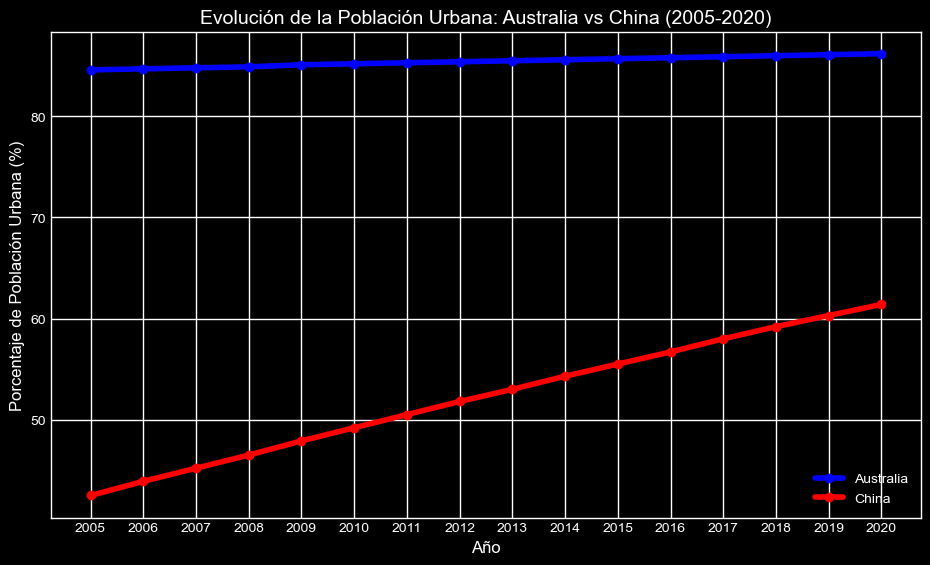

In [62]:
# Resolver acá estilo pyplot
# Extraer años de las columnas (el segundo nivel del MultiIndex)
años = [str(año) for año in range(2005, 2021)]  # De 2005 a 2020

# Inicializar listas para almacenar los datos de Australia y China
datos_aus = []
datos_chn = []

# Recorremos los años y extraemos los datos correspondientes para Australia y China
for año in años:
    # Acceder a las columnas con el formato correcto
    columna = ('Urban Population (%)', año)  # Crear la tupla para el MultiIndex
    
    # Obtener los valores para Australia y China de esa columna
    datos_aus.append(dfU[columna]['Australia'])
    datos_chn.append(dfU[columna]['China'])

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar los datos de Australia y China
plt.plot(años, datos_aus, label='Australia', marker='o', color='b')
plt.plot(años, datos_chn, label='China', marker='o', color='r')

# Agregar títulos y etiquetas
plt.title("Evolución de la Población Urbana: Australia vs China (2005-2020)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Porcentaje de Población Urbana (%)", fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

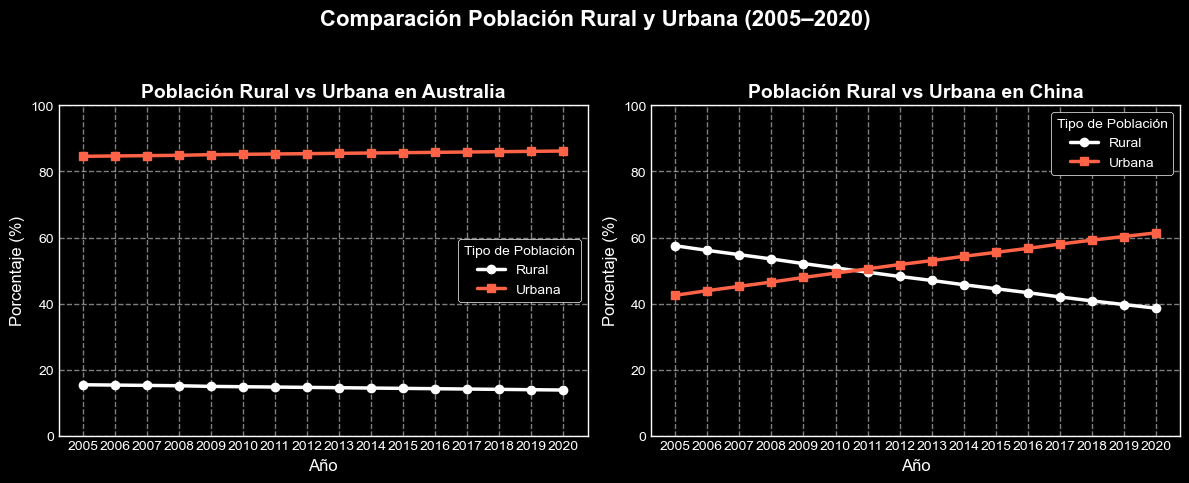

In [63]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
# Transponer para que los años pasen a ser el índice
df_rural_t = dfR.T  # Transpone el dataframe

# Eliminar el primer nivel del MultiIndex de las columnas (si solo hay una variable)
df_rural_t.index = df_rural_t.index.droplevel(0)

# Ahora los países están como columnas y los años como índice
df_rural_t.index.name = "Año"
df_rural_t.columns.name = "País"

# Transponer el DataFrame de población urbana para que los años sean el índice
df_urbana_t = dfU.T  
df_urbana_t.index = df_urbana_t.index.droplevel(0)  # Eliminar primer nivel del MultiIndex
df_urbana_t.index.name = "Año"  # Etiqueta para el índice
df_urbana_t.columns.name = "País"  # Etiqueta para las columnas

# Estilo visual
plt.style.use("dark_background")

# Crear figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Seleccionar los ejes que se van a usar
ejes = [ax[0, 0], ax[0, 1]]
paises = ["Australia", "China"]

# Colores y marcadores para rural y urbana
colores = {
    "Rural": "white",
    "Urbana": "tomato"
}
marcadores = {
    "Rural": "o",
    "Urbana": "s"
}

# Graficar por país
for i, pais in enumerate(paises):
    # Población rural
    ejes[i].plot(
        df_rural_t.index, df_rural_t[pais],
        label="Rural",
        color=colores["Rural"],
        marker=marcadores["Rural"],
        linewidth=2.5,
        markersize=6
    )
    
    # Población urbana
    ejes[i].plot(
        df_urbana_t.index, df_urbana_t[pais],
        label="Urbana",
        color=colores["Urbana"],
        marker=marcadores["Urbana"],
        linewidth=2.5,
        markersize=6
    )

    # Personalización
    ejes[i].set_title(f"Población Rural vs Urbana en {pais}", fontsize=14, weight='bold')
    ejes[i].set_xlabel("Año", fontsize=12)
    ejes[i].set_ylabel("Porcentaje (%)", fontsize=12)
    ejes[i].set_ylim(0, 100)
    ejes[i].grid(True, linestyle="--", alpha=0.5)
    ejes[i].legend(title="Tipo de Población", fontsize=10, facecolor="black", edgecolor="white", framealpha=1, frameon=True)
    

# Eliminar los subgráficos no usados
fig.delaxes(ax[1, 0])
fig.delaxes(ax[1, 1])

# Título general
plt.suptitle("Comparación Población Rural y Urbana (2005–2020)", fontsize=16, weight='bold', y=1.03)

# Ajustar espaciado
plt.tight_layout()
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unidecode import unidecode  # Para eliminar acentos

# URL de Infobae
URL = "https://www.infobae.com"

# Descargar la página
pag = requests.get(URL)
contenido = pag.content

# Analizar con BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

# Extraer los títulos de las noticias
titulos = [h2.get_text().strip() for h2 in soup.find_all('h2', class_="story-card-hl headline-link")]

# Extraer los links de las noticias
Links_elements = soup.find_all('a', href=True)
Links = []

for t in Links_elements:
    Link = t['href']

    # Si el enlace es relativo, lo convertimos en absoluto
    if Link.startswith('/'):
        Link = URL + Link

    # Extraer la última parte de la URL (slug) y separar en palabras
    partes_link = [unidecode(p.lower()) for p in Link.rstrip('/').split("/")[-1].split("-")]

    for titulo in titulos:
        palabras_titulo = [unidecode(p.lower()) for p in titulo.strip().split()]
        
        # Si el título contiene "Javier Milei", agregue este filtro ya que Javier Milei tiene su propio apartado en Infobae
        if "javier" in palabras_titulo and "milei" in palabras_titulo:
            if "javier" in partes_link and "milei" in partes_link:
                # Buscar una tercera palabra del título que también esté en el link
                otra_palabra = next(
                    (p for p in palabras_titulo if p not in ["javier", "milei"] and p in partes_link),
                    None
                )
                if otra_palabra:
                    print("Coincidencia encontrada (Javier Milei + otra palabra):", titulo)
                    Links.append({'Título': titulo, 'Link': Link})
                    break  # Evita agregar el mismo link más de una vez
        else:
            # Comparación con la primera palabra normalizada
            primera_palabra_titulo = palabras_titulo[0] if palabras_titulo else ""
            primera_palabra_link = partes_link[0] if partes_link else ""

            if primera_palabra_titulo == primera_palabra_link:
                print("Coincidencia encontrada:", titulo)
                Links.append({'Título': titulo, 'Link': Link})
                break  # Evita agregar el mismo link más de una vez

# Crear DataFrame con los links filtrados
DfL = pd.DataFrame(Links)

# 🔹 **Eliminar duplicados por título**
DfL = DfL.drop_duplicates(subset=["Título"], keep="first").reset_index(drop=True)

# Mostrar el DataFrame
display(DfL)

# Guardar en Excel
DfL.to_excel('Noticias_filtradas.xlsx', index=False)
print("Archivo de Excel guardado como 'Noticias_filtradas.xlsx'")

✅ Coincidencia encontrada (Javier Milei + otra palabra): Javier Milei dijo que Argentina readecuará su legislación para atenuar el impacto de los aranceles de Trump
Coincidencia encontrada: Con votos del PRO y el kirchnerismo, el Senado rechazó las candidaturas de Ariel Lijo y García-Mansilla a la Corte Suprema
Coincidencia encontrada: El juez Ramos Padilla le ordenó a García-Mansilla que se abstenga de firmar nuevos fallos en la Corte
Coincidencia encontrada: La dignidad republicana y el deber de renunciar ante el rechazo del Senado
Coincidencia encontrada: Crónica de una muerte anunciada
Coincidencia encontrada: Uno por uno, cómo votaron los senadores los pliegos de Ariel Lijo y García-Mansilla a la Corte Suprema
Coincidencia encontrada: El juez Ramos Padilla le ordenó a García-Mansilla que se abstenga de firmar nuevos fallos en la Corte
Coincidencia encontrada: Alpine confirmó cuándo regresará Colapinto a un GP: su plan de trabajo para volver a correr en F1
Coincidencia encontrada: 

,Título,Link
0,Javier Milei dijo que Argentina readecuará su ...,https://www.infobae.com/politica/2025/04/04/ja...
1,"Con votos del PRO y el kirchnerismo, el Senado...",https://www.infobae.com/politica/2025/04/03/co...
2,El juez Ramos Padilla le ordenó a García-Mansi...,https://www.infobae.com/judiciales/2025/04/04/...
3,La dignidad republicana y el deber de renuncia...,https://www.infobae.com/opinion/2025/04/03/la-...
4,Crónica de una muerte anunciada,https://www.infobae.com/opinion/2025/04/04/cro...
...,...,...
57,Kevin Bacon regresa a la pantalla chica con “C...,https://www.infobae.com/que-puedo-ver/2025/04/...
58,Se cumplen 40 años del estreno de La historia ...,https://www.infobae.com/teleshow/2025/04/03/se...
59,Dua Lipa anunció su show más grande en Argenti...,https://www.infobae.com/teleshow/2025/04/02/du...
60,Juanita Tinelli negó los rumores de ruptura y ...,https://www.infobae.com/teleshow/2025/04/02/ju...


Archivo de Excel guardado como 'Noticias_filtradas.xlsx'
